In [135]:
# We have to do it with the legacy scipy.fftpack instead of scipy.fft because our scipy version is old.
from numpy.fft import fft, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt

In [136]:
def f(x):
#     return 1*np.sin(np.pi*2*x)+0.5*np.sin(np.pi*4*x)+0.1*np.sin(np.pi*100*x)
    return 1*np.sin(np.pi*2*x)+0.5*np.sin(np.pi*4*x)
def df(x):
#     return 1*np.cos(np.pi*2*x)+0.5*np.cos(np.pi*4*x)+0.1*np.cos(np.pi*100*x)
    return 1*np.cos(np.pi*2*x)+0.5*np.cos(np.pi*4*x)
def g(x):
    return np.exp(-x*x)
def dg(x):
    return -x*2*np.exp(-x*x) # broadcasting.

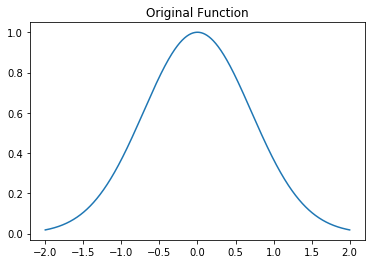

In [137]:
func=g
dfunc=dg
slices=1024
# Plot the original function.
sampleRange=2
x=np.linspace(-sampleRange,sampleRange,slices)
y=func(x)
plt.figure()
plt.title("Original Function")
plt.plot(x,y)

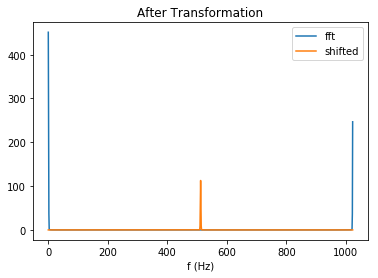

In [138]:
ky=fft(y)
# print(ky)
shifted=fftshift(ky)/sampleRange/2
plt.figure()
plt.title("After Transformation")
kx=np.arange(slices)
plt.plot(kx,np.abs(ky)     ,label="fft")
plt.plot(kx,np.abs(shifted),label="shifted")
plt.xlabel("f (Hz)")
plt.legend()

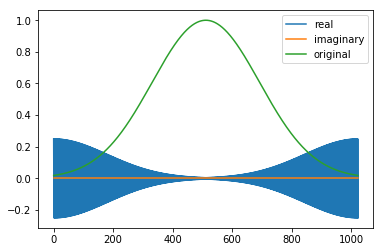

In [139]:
# Incorrect way of inverse transformation...
shiftedInversed=ifftshift(ifft(shifted))
plt.figure()
plt.plot(np.real(shiftedInversed))
plt.plot(np.imag(shiftedInversed))
plt.plot(y)
plt.legend(["real","imaginary","original"])
# What the f**k is this...

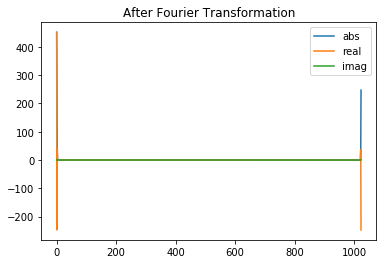

In [140]:
# Studying on the real and imaginary parts
plt.figure()
plt.title("After Fourier Transformation")
plt.plot(kx,np.abs(ky) ,label="abs")
plt.plot(kx,np.real(ky) ,label="real")
plt.plot(kx,np.imag(ky),label="imag")
plt.legend()

There's no definite conclusions about whether real part or imaginary part should be zero.

D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


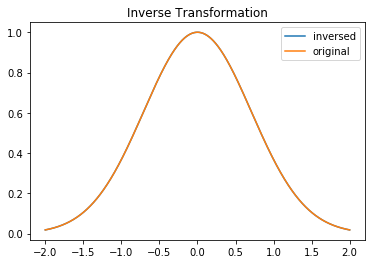

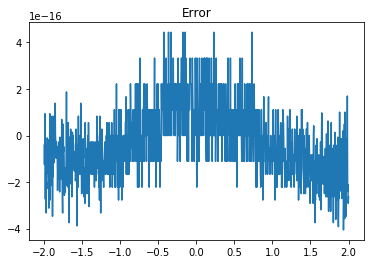

In [141]:
# Illustrations on inverse transformation.
inversed=ifft(ky)
plt.figure()
plt.title("Inverse Transformation")
plt.plot(x,inversed,label="inversed")
plt.plot(x,y, label="original")
plt.legend()

# plot the errors
plt.figure()
plt.title("Error")
plt.plot(x,y-inversed)

We can't see distinguishable differences between the original function and the one that has been transformed and inverse tranformed back. As is proved from the error plot, the errors are at the amplitude of $10^{-16}$, which is strikingly low indeed.

Anyway, let's move on to calculate the derivatives.

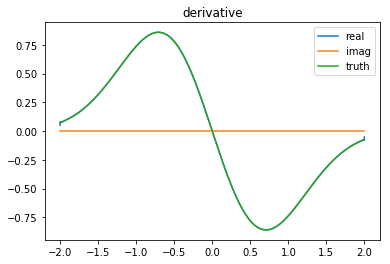

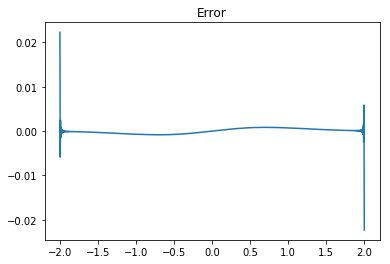

In [142]:
kx=np.arange(-slices/2,slices/2)/sampleRange/2
# Turns out the fftshift is the key...
kx=fftshift(kx)
dky=ky*kx*2*np.pi*(1j)
dy=ifft(dky)
plt.figure()
plt.title("derivative")
# plt.plot(x,np.abs(dy) ,label="abs")
plt.plot(x,np.real(dy),label="real")
plt.plot(x,np.imag(dy),label="imag")
plt.plot(x,dfunc(x)   ,label="truth")
plt.legend()

# plot error
plt.figure()
plt.title("Error")
plt.plot(x,dfunc(x)-np.real(dy))

The errors emerge at the beginning and ending points, which is due to the discontinuity of derivavtives (after periodical continuation) at those points. Other than that, the rest of the derivative is accurate enough.

It should be noted that the term `kx` should be shifted, in order to get a right result. You can comment out the line about `fftshift` and see what happens. The reason why this shift is necessary has to do with the mechanisms of fft. In effect, the right half of the transformed waveform is actually the negative part of the frequency spectrum, which has been automatically rearranged to this position. So to make the corresponding frequencies correct, we should shift the `kx` and multiply with it.

Also amazingly, the inverse transformation will take care of this shift, again automatically. If we want to manually apply a fftshift, we will, in contrast, get a wrong result, just like we did earlier.

To illustrate that the surge at endpoints is due to the discontinuity there, we change the function to a sine wave and repeat the process:

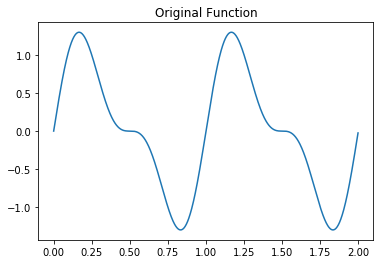

In [148]:
func=f
dfunc=df
# Plot the original function.
sampleRange=2
x=np.linspace(0,sampleRange,slices,endpoint=False)
y=func(x)
plt.figure()
plt.title("Original Function")
plt.plot(x,y)

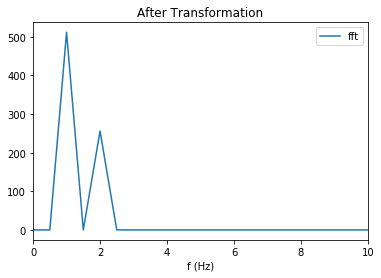

In [154]:
ky=fft(y)
shifted=fftshift(ky)
plt.figure()
plt.title("After Transformation")
kx=np.arange(slices)/sampleRange
plt.plot(kx,np.abs(ky)     ,label="fft")
plt.xlabel("f (Hz)")
plt.xlim((0,10))
plt.legend()

D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


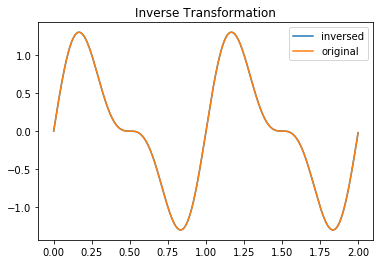

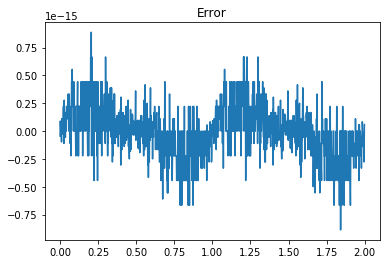

In [150]:
# Illustrations on inverse transformation.
inversed=ifft(ky)
plt.figure()
plt.title("Inverse Transformation")
plt.plot(x,inversed,label="inversed")
plt.plot(x,y, label="original")
plt.legend()

# plot the errors
plt.figure()
plt.title("Error")
plt.plot(x,y-inversed)

We can't see distinguishable differences between the original function and the one that has been transformed and inverse tranformed back. As is proved from the error plot, the errors are at the amplitude of $10^{-16}$, which is strikingly low indeed.

Anyway, let's move on to calculate the derivatives.

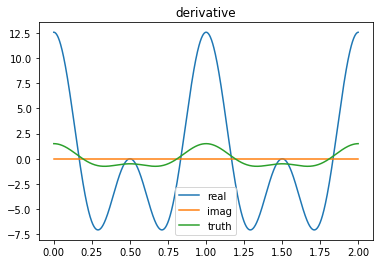

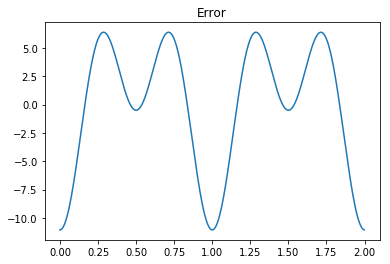

In [158]:
kx=np.arange(-slices/2,slices/2)/sampleRange
# Turns out the fftshift is the key...
kx=fftshift(kx)
dky=ky*kx*1j*2*np.pi
dy=ifft(dky)
plt.figure()
plt.title("derivative")
# plt.plot(x,np.abs(dy) ,label="abs")
plt.plot(x,np.real(dy),label="real")
plt.plot(x,np.imag(dy),label="imag")
plt.plot(x,dfunc(x)   ,label="truth")
plt.legend()

# plot error
plt.figure()
plt.title("Error")
plt.plot(x,dfunc(x)-np.real(dy))